<a href="https://colab.research.google.com/github/renaissag/electrical_engineeing_Quantum_Devices_KNN/blob/main/Renaissa_Quantum_Devices_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from google.colab import files
uploaded=files.upload()

Saving quantum_devices_ml_dataset.csv to quantum_devices_ml_dataset (1).csv


In [20]:
df = pd.read_csv("quantum_devices_ml_dataset.csv")
df

,journal_topic,device_type,material_system,application_area,temperature_K,bias_voltage_V,quantum_well_width_nm,bandgap_eV,effective_mass_me,barrier_height_eV,photon_wavelength_nm,photon_energy_eV,is_infrared,spin_polarization,quantum_efficiency,performance_metric,meets_spec,device_complexity_index
0,k·p Perturbation Theory,Quantum Well Laser,ZnSe-based,Non-Volatile Memory,324.07,3.790,2.096,2.894,0.338,0.338,408.0,3.039,0,0.238,0.450,28.940,1,0.656
1,Schrodinger Cat Paradox,QD-Based LCD Pixel,GaAs/AlGaAs,Non-Volatile Memory,281.88,3.980,2.973,1.534,0.295,0.374,738.4,1.679,1,-0.081,0.637,29.353,1,0.330
2,Photoelectric Effect,Spintronic MRAM Cell,GaAs/AlGaAs,Infrared Sensing,278.66,4.292,1.152,1.371,0.409,0.245,984.5,1.260,1,0.670,0.576,27.754,1,0.488
3,k·p Perturbation Theory,Quantum Cascade Laser,InGaAs/InP,Non-Volatile Memory,311.49,4.778,2.896,0.812,0.238,0.256,1523.6,0.814,1,-0.156,0.757,36.762,1,0.259
4,Quantum Cascade Laser,Quantum Cascade Laser,CdSe/CdS QDs,Infrared Sensing,324.71,2.134,4.042,1.765,0.399,0.354,797.7,1.554,1,-0.198,0.316,5.918,0,0.462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,Quantum Cascade Laser,Quantum Cascade Laser,MoS2,Non-Volatile Memory,292.64,1.982,3.652,2.294,0.277,0.313,540.5,2.294,0,0.068,0.381,7.902,0,0.388
746,Quantum Cascade Laser,Spintronic MRAM Cell,CdSe/CdS QDs,Infrared Sensing,288.60,3.531,0.911,1.813,0.153,0.209,659.3,1.881,0,0.733,0.640,33.127,1,0.501
747,Colloidal Quantum Dots,Avalanche Photodiode,GaAs/AlGaAs,Visible LEDs,310.94,3.114,4.895,1.346,0.200,0.378,903.8,1.372,1,-0.115,0.506,13.827,0,0.450
748,Quantum Cascade Laser,Avalanche Photodiode,GaAs/AlGaAs,Visible LEDs,315.27,3.184,3.787,1.285,0.261,0.155,1005.2,1.234,1,-0.129,0.665,20.706,1,0.459


In [21]:
df.shape

(750, 18)

In [22]:
# Create a copy of the numeric data to avoid modifying the original
no_outlier = df.copy()

def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64", "int32", "int16", "int8"]:
        # For integer columns, round the fence values and cast them to integers
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf

# Apply outlier cleanup to specific columns
my_conti_cols = ['temperature_K', 'bias_voltage_V', 'quantum_well_width_nm', 'bandgap_eV', 'effective_mass_me', 'barrier_height_eV',
       'photon_wavelength_nm', 'photon_energy_eV', 'spin_polarization', 'quantum_efficiency', 'performance_metric', 'device_complexity_index']
for col in my_conti_cols:
    outlier_cleanup(col)

no_outlier

,journal_topic,device_type,material_system,application_area,temperature_K,bias_voltage_V,quantum_well_width_nm,bandgap_eV,effective_mass_me,barrier_height_eV,photon_wavelength_nm,photon_energy_eV,is_infrared,spin_polarization,quantum_efficiency,performance_metric,meets_spec,device_complexity_index
0,k·p Perturbation Theory,Quantum Well Laser,ZnSe-based,Non-Volatile Memory,324.07,3.790,2.096,2.894,0.338,0.338,408.0000,3.039,0,0.238,0.450,28.940,1,0.656
1,Schrodinger Cat Paradox,QD-Based LCD Pixel,GaAs/AlGaAs,Non-Volatile Memory,281.88,3.980,2.973,1.534,0.295,0.374,738.4000,1.679,1,-0.081,0.637,29.353,1,0.330
2,Photoelectric Effect,Spintronic MRAM Cell,GaAs/AlGaAs,Infrared Sensing,278.66,4.292,1.152,1.371,0.409,0.245,984.5000,1.260,1,0.670,0.576,27.754,1,0.488
3,k·p Perturbation Theory,Quantum Cascade Laser,InGaAs/InP,Non-Volatile Memory,311.49,4.778,2.896,0.812,0.238,0.256,1499.0625,0.814,1,-0.156,0.757,36.762,1,0.259
4,Quantum Cascade Laser,Quantum Cascade Laser,CdSe/CdS QDs,Infrared Sensing,324.71,2.134,4.042,1.765,0.399,0.354,797.7000,1.554,1,-0.198,0.316,5.918,0,0.462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,Quantum Cascade Laser,Quantum Cascade Laser,MoS2,Non-Volatile Memory,292.64,1.982,3.652,2.294,0.277,0.313,540.5000,2.294,0,0.068,0.381,7.902,0,0.388
746,Quantum Cascade Laser,Spintronic MRAM Cell,CdSe/CdS QDs,Infrared Sensing,288.60,3.531,0.911,1.813,0.153,0.209,659.3000,1.881,0,0.733,0.640,33.127,1,0.501
747,Colloidal Quantum Dots,Avalanche Photodiode,GaAs/AlGaAs,Visible LEDs,310.94,3.114,4.895,1.346,0.200,0.378,903.8000,1.372,1,-0.115,0.506,13.827,0,0.450
748,Quantum Cascade Laser,Avalanche Photodiode,GaAs/AlGaAs,Visible LEDs,315.27,3.184,3.787,1.285,0.261,0.155,1005.2000,1.234,1,-0.129,0.665,20.706,1,0.459


In [23]:
# Label Encoding in categorical columns
from sklearn import preprocessing

categ = df.select_dtypes(exclude="number")

for i in categ.columns:
    encoder = preprocessing.LabelEncoder()  # Encoder is the object of 'LabelEncoder'.
    no_outlier[i] = encoder.fit_transform(no_outlier[i])

no_outlier

,journal_topic,device_type,material_system,application_area,temperature_K,bias_voltage_V,quantum_well_width_nm,bandgap_eV,effective_mass_me,barrier_height_eV,photon_wavelength_nm,photon_energy_eV,is_infrared,spin_polarization,quantum_efficiency,performance_metric,meets_spec,device_complexity_index
0,6,4,6,2,324.07,3.790,2.096,2.894,0.338,0.338,408.0000,3.039,0,0.238,0.450,28.940,1,0.656
1,3,2,1,2,281.88,3.980,2.973,1.534,0.295,0.374,738.4000,1.679,1,-0.081,0.637,29.353,1,0.330
2,1,5,1,1,278.66,4.292,1.152,1.371,0.409,0.245,984.5000,1.260,1,0.670,0.576,27.754,1,0.488
3,6,3,3,2,311.49,4.778,2.896,0.812,0.238,0.256,1499.0625,0.814,1,-0.156,0.757,36.762,1,0.259
4,2,3,0,1,324.71,2.134,4.042,1.765,0.399,0.354,797.7000,1.554,1,-0.198,0.316,5.918,0,0.462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,3,4,2,292.64,1.982,3.652,2.294,0.277,0.313,540.5000,2.294,0,0.068,0.381,7.902,0,0.388
746,2,5,0,1,288.60,3.531,0.911,1.813,0.153,0.209,659.3000,1.881,0,0.733,0.640,33.127,1,0.501
747,0,1,1,5,310.94,3.114,4.895,1.346,0.200,0.378,903.8000,1.372,1,-0.115,0.506,13.827,0,0.450
748,2,1,1,5,315.27,3.184,3.787,1.285,0.261,0.155,1005.2000,1.234,1,-0.129,0.665,20.706,1,0.459


In [24]:
from sklearn.preprocessing import MinMaxScaler

def my_scaling(col):
    my_scaling_obj = MinMaxScaler()
    no_outlier[col] = pd.DataFrame(my_scaling_obj.fit_transform(no_outlier[col].to_numpy().reshape(-1,1)))
    return no_outlier[col]
my_numerical_cols = ['temperature_K', 'bias_voltage_V', 'quantum_well_width_nm', 'bandgap_eV', 'effective_mass_me', 'barrier_height_eV',
       'photon_wavelength_nm', 'photon_energy_eV', 'spin_polarization', 'quantum_efficiency', 'performance_metric', 'device_complexity_index']
for i in my_numerical_cols:
    no_outlier[i] = my_scaling(i)
no_outlier

,journal_topic,device_type,material_system,application_area,temperature_K,bias_voltage_V,quantum_well_width_nm,bandgap_eV,effective_mass_me,barrier_height_eV,photon_wavelength_nm,photon_energy_eV,is_infrared,spin_polarization,quantum_efficiency,performance_metric,meets_spec,device_complexity_index
0,6,4,6,2,0.705225,0.627167,0.198310,0.796713,0.571429,0.544552,0.090070,0.711823,0,0.616164,0.450000,0.630498,1,0.733597
1,3,2,1,2,0.384096,0.660107,0.307281,0.340490,0.486111,0.612621,0.365619,0.329787,1,0.385193,0.725000,0.639495,1,0.364819
2,1,5,1,1,0.359587,0.714199,0.081014,0.285810,0.712302,0.368707,0.570863,0.212086,1,0.928953,0.635294,0.604659,1,0.543552
3,6,3,3,2,0.609473,0.798457,0.297714,0.098289,0.373016,0.389506,1.000000,0.086801,1,0.330890,0.901471,0.800911,1,0.284502
4,2,3,0,1,0.710097,0.340066,0.440109,0.417981,0.692460,0.574805,0.415074,0.294673,1,0.300480,0.252941,0.128932,0,0.514140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,3,4,2,0.465996,0.313714,0.391650,0.595438,0.450397,0.497282,0.200573,0.502546,0,0.493076,0.348529,0.172156,0,0.430430
746,2,5,0,1,0.435245,0.582264,0.051069,0.434083,0.204365,0.300638,0.299651,0.386530,0,0.974568,0.729412,0.721717,1,0.558258
747,0,1,1,5,0.605286,0.509969,0.546098,0.277424,0.297619,0.620184,0.503560,0.243548,1,0.360576,0.532353,0.301240,0,0.500566
748,2,1,1,5,0.638244,0.522105,0.408424,0.256961,0.418651,0.198535,0.588126,0.204782,1,0.350439,0.766176,0.451109,1,0.510747


**K-Nearest Neighbors**

# Features:
# 1. quantum_efficiency - Devices with greater internal quantum efficiency typically meet specifications.
# 2. bias_voltage_V - KNN gains from this since voltage has a direct relationship with device output.
#                     Higher bias leads to higher injection and improved performance.
# 3. spin_polarization - For KNN, Spintronic devices receive a performance enhancement, and others do not.
#                        This results in a beneficial clustering structure for KNN.
# 4. bandgap_eV - It influences photon energy matching, recombination rate, gain/absorption efficiency, and thermal sensitivity.
#                 It is very informative for pass/fail classification.
# 5. photon_wavelength_nm - Since infrared devices have a lower performance threshold, wavelength assists KNN in differentiating the two clusters.
#                           This feature allows KNN to accurately categorize "IR devices that pass" vs. "visible devices that fail".

750
27
0.9047619047619048
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1
 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1
 1 0 0]
[0 1]
27
23
Accuracy Values: [0.8977777777777778, 0.9111111111111111, 0.8933333333333333, 0.9111111111111111, 0.9111111111111111, 0.9155555555555556, 0.9111111111111111, 0.9022222222222223, 0.8977777777777778, 0.8933333333333333, 0.8977777777777778, 0.8933333333333333, 0.8933333333333333, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8977777777777778, 0.8933333333333333, 0.8888888888888888, 0.8844444444444445, 0.8844444444444445, 0.88, 0.8844444444444445, 0.88, 0.871111111111

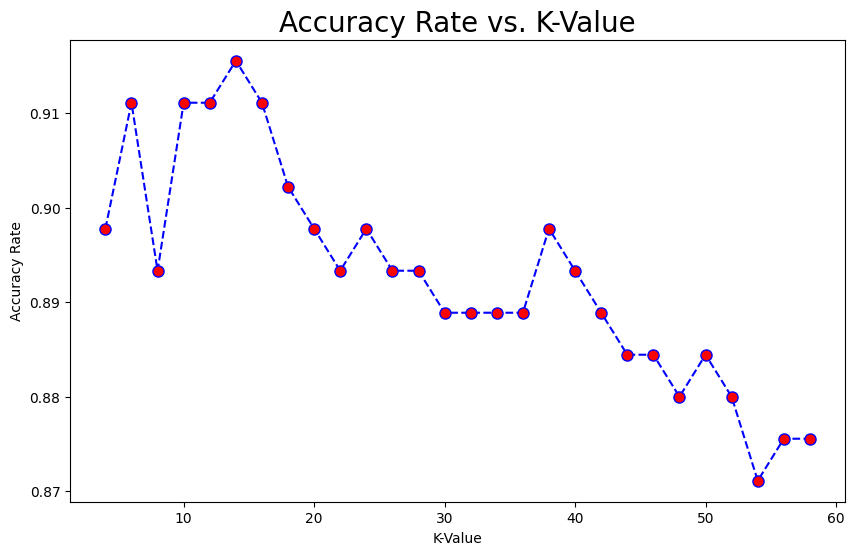

Accuracy Score: 0.9022222222222223
F1 Score: 0.8884733237202596


In [25]:
# Split again from the full processed data

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve

# y: target variable is 'meets_spec'
y = no_outlier["meets_spec"]

# Drop target and irrelevant columns from features
x = no_outlier[["quantum_efficiency", "bias_voltage_V", "spin_polarization", "bandgap_eV", "photon_wavelength_nm"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

n = len(no_outlier)  # number of elements (rows) in a dataset without any outliers (input variable)
print(n)
# Assume the value 'k' as the square root of the number of elements (rows) in an array
k = int(round(n)**0.5)
print(k)  # This is NOT the best value of 'k'.

from sklearn.neighbors import KNeighborsClassifier
my_knn = KNeighborsClassifier(27)  # k-value needs to be selected by the user (k = 27).
my_model_1 = my_knn.fit(x_train, y_train)  # Train the model.
print(my_model_1.score(x_train, y_train))

y_pred = my_model_1.predict(x_test)
print(y_pred)

my_model_1.classes_  # The class refers to unique values of the target column in a classification problem.
print(my_model_1.classes_)

my_model_1.n_neighbors
print(my_model_1.n_neighbors)

k2 = int(round(len(x_train)**0.5, 0))  # Initial but NOT final 'k'
print(k2)

# Choosing 'k' by elbow method
# To find the value of 'k', we will create multiple temporary models.
accuracy = []
k_values = np.arange(4, 60, 2)
for my_k2 in k_values:
    temp = KNeighborsClassifier(my_k2)
    temp.fit(x_train, y_train)
    y2_pred = temp.predict(x_test)
    accuracy.append(accuracy_score(y_test, y2_pred))
print("Accuracy Values:", accuracy)
print("K-values:", k_values)

plt.figure(figsize=(10,6))
plt.plot(k_values, accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Accuracy Rate vs. K-Value', fontsize=20)
plt.xlabel('K-Value')
plt.ylabel('Accuracy Rate')
plt.show()

# By looking at the above plot, we will finalize the k-value as 23 to get maximum accuracy.
final_model = KNeighborsClassifier(k2)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
f1_knn = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1_knn)

In [26]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(knn, param_knn, cv=3, n_jobs=-1, scoring='accuracy')
grid_knn.fit(x_train, y_train)

grid_knn.best_params_, grid_knn.best_score_


({'n_neighbors': 3, 'weights': 'distance'}, np.float64(0.8933333333333334))

In [27]:
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred, average='macro')

acc_knn, f1_knn

(0.9022222222222223, 0.8884733237202596)

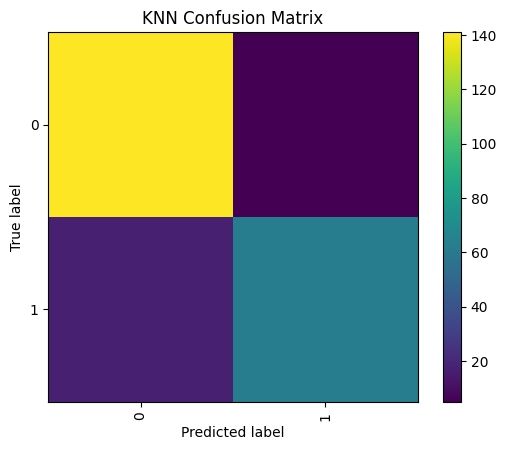

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_knn = confusion_matrix(y_test, y_pred, labels=best_knn.classes_)

ConfusionMatrixDisplay(cm_knn, display_labels=best_knn.classes_).plot(
    xticks_rotation='vertical', include_values=False
)
plt.title("KNN Confusion Matrix")
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20]
}

grid_rf = GridSearchCV(rf, param_rf, cv=3, n_jobs=-1, scoring='accuracy')
grid_rf.fit(x_train, y_train)

grid_rf.best_params_, grid_rf.best_score_

({'max_depth': None, 'n_estimators': 100}, np.float64(0.900952380952381))

In [30]:
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

acc_rf, f1_rf

(0.9244444444444444, 0.9152805156260382)

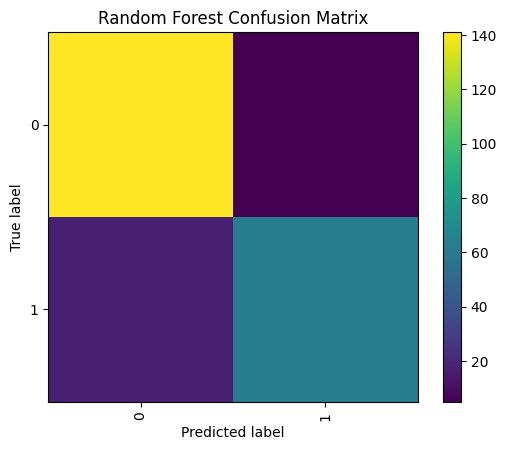

In [31]:
cm_rf = confusion_matrix(y_test, y_pred, labels=best_rf.classes_)

ConfusionMatrixDisplay(cm_rf, display_labels=best_rf.classes_).plot(
    xticks_rotation='vertical', include_values=False
)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [32]:
pd.DataFrame({
    "Model": ["KNN", "Random Forest"],
    "Accuracy": [acc_knn, acc_rf],
    "Macro F1": [f1_knn, f1_rf]
})

,Model,Accuracy,Macro F1
0,KNN,0.902222,0.888473
1,Random Forest,0.924444,0.915281


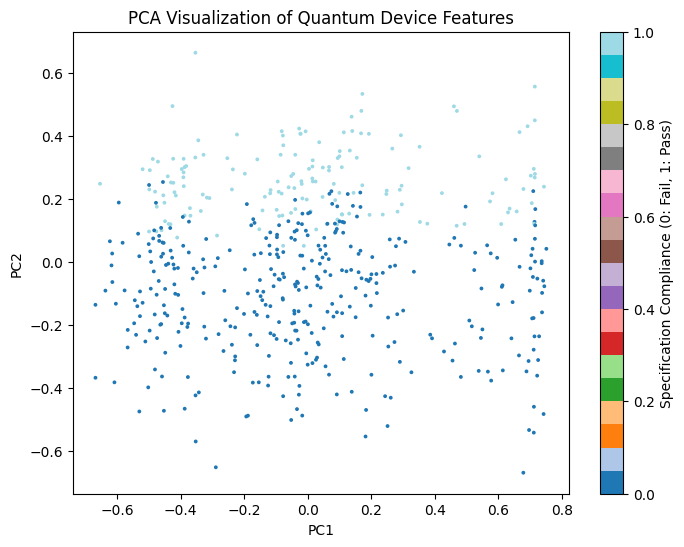

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train.astype('category').cat.codes, cmap='tab20', s=3)
plt.title("PCA Visualization of Quantum Device Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Specification Compliance (0: Fail, 1: Pass)")
plt.show()
